In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
# L distance
def L(x,y,p=2):
    if len(x)==len(y) and len(x)>1:
        sum = 0
        for i in range(len(x)):
            sum += np.power(np.abs(x[i]-y[i]),p)
        return np.power(sum,1/p)
    else:
        return 0

In [3]:
# data
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


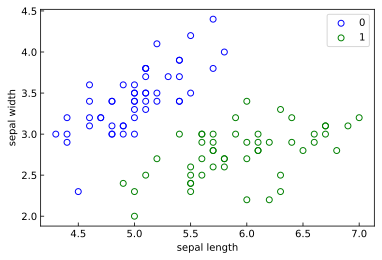

In [4]:
# display data
plt.figure(figsize=(6,4))
plt.tick_params(direction='in')
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'],c='',edgecolors='b',label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'],c='',edgecolors='g',label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [5]:
# train test split data
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
class KNN:
    def __init__(self,X_train,y_train,n_neighbors=3,p=2):
        """
        parameter n_neighbors:the value of k
        parameter p:L distance 
        parameter X_train:
        parameter y_train:
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self,X):
        knn_list=[]
        # calculate the L distance
        for i in range(self.n):
            dist = np.linalg.norm(X-self.X_train[i],ord=self.p)
            knn_list.append((dist,self.y_train[i]))
            
        for i in range(self.n,len(self.X_train)):
            max_index = knn_list.index(max(knn_list,key=lambda x:x[0]))
            dist = np.linalg.norm(X-self.X_train[i],ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist,self.y_train[i])
                
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs.items(),key = lambda x:x[1])[-1][0]
        return max_count
    
    def score(self,X_test,y_test):
        right = 0
        n = 10
        for X,y in zip(X_test,y_test):
            label = self.predict(X)
            if label == y:
                right += 1
        return right/len(X_test)

In [7]:
clf = KNN(X_train, y_train)

In [8]:
clf.score(X_test, y_test)

1.0

In [9]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


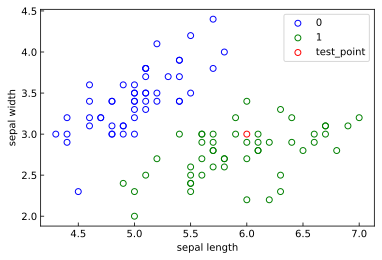

In [10]:
# display data
plt.figure(figsize=(6,4))
plt.tick_params(direction='in')
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'],c='',edgecolors='b',label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'],c='',edgecolors='g',label='1')
plt.scatter(test_point[0], test_point[1], label='test_point',c='',edgecolors='r')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()